In [2]:
#link for understanding #https://medium.com/@hastisutaria.ict19/object-detection-using-opencv-f94f61e88b23
#https://mechanicallearnings.wordpress.com/2021/04/21/object-detection-algorithm/

In [3]:
import cv2    #pip install opencv-python

In [4]:
import matplotlib.pyplot as plt

In [5]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [7]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0000022EFF644490>

# Read an Image

In [11]:
img = cv2.imread('handsome-bearded-manager-entering-his-car.jpg')

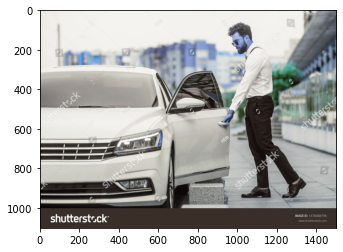

In [12]:
plt.imshow(img)

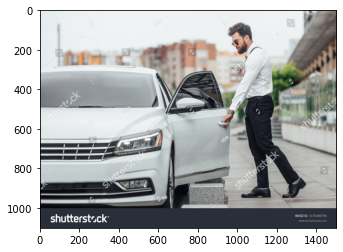

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[1 3]


In [16]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

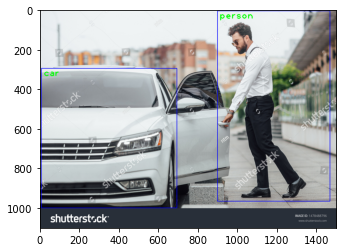

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video Demo

In [19]:
cap=cv2.VideoCapture("Video.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("cant open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
            cv2.imshow('object Detection Tutorial',frame)
            if cv2.waitKey(2) & 0xFF ==ord('q'):
                break
                
cap.release()
cv2.destroyAllWindows()    

[1 3]
()
[3]
[1 3]
[1]
[1]
[1]
[1 3]
[1]
[1]
[1 1]
()
()
()
()
()
[3 3]
[1]
[1]
()
[1]
[1 1]
[1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1]
[3]
[1 1]
[1 1 1]
[1 3 1]
[1 3 1 1]
[3 1]
[3]
[3]
[3]
[3]
()
[1 1]
()
()
()
[1 1]
[1 3]
[3 1]
[3 1 1]
[3 1 1 1]
[3 1]
[3 1]
[3]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1 1]
[3]
[3]
[3 1]
[3]
[3 1]
[3 1]
[3]
[ 3 72  1]
[3 1]
[3 1 1 1]
[1 3 1 1 1]
[72  3]
[ 3 72]
[3 1]
[ 3  1 72]
[72  3  1]
[ 3 72  1]
[3 1 1 1]
[72  1  1]
[ 1  1 72]
[ 1 72  1]
[72  1  1]
[ 1  1 72]
[1 1]
[3]
[3]
[3]
[72  3]
[ 3 72]
[3]
[3]
[3 1 1]
[3 1 1]
[ 3  1 72  1  1]
[3 1]
[1 3]
[3 1]
[1]
[72  1]
[ 1  1  3  3 72  1]
[ 1  1  3 72]
[1]
[1 1]
[ 1 72]
[3 1]
[1 3]
[3 1]
[3 1]
[3 1]
[3 1 8]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[1 3 1]
[1 1 3 1]
[1 1 3 1]
[1 1 1 3]
[1 1 3 1]
[1 1]
[1 1]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# WebCam Demo

In [ ]:
# import cv2
# from cv2 import *
# cap=cv2.VideoCapture(1)

# if not cap.isOpened():
#     cap=cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("cant open webcame")
    
# font_scale=3
# font=cv2.FONT_HERSHEY_PLAIN

# while True:
#     ret,frame=cap.read()
    
#     ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
#     print(ClassIndex)
#     if(len(ClassIndex)!=0):
#         for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
#             if (ClassInd<=80):
#                 cv2.rectangle(frame,boxes,(255,0,0),2)
#                 cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
#             cv2.imshow('object Detection Tutorial',frame)
#             if cv2.waitKey(0) & 0xFF ==ord('q'):
#                 break
                
# cap.release()
# cv2.destroyAllWindows()   